In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
len(df)

375

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [7]:
df["Age"].fillna("55", inplace=True)
df["Gender"].fillna("missing", inplace=True)
df["Job Title"].fillna("missing", inplace=True)
df["Years of Experience"].fillna("20", inplace=True)
df["Education Level"].fillna("missing", inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
len(df)

373

In [11]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [12]:
dummies = pd.get_dummies(df[['Gender','Age','Education Level', 'Job Title', 'Years of Experience',
       'Salary']])
dummies

C:\Users\Henry Morgan\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Salary,Gender_Female,Gender_Male,Age_23.0,Age_24.0,Age_25.0,Age_26.0,Age_27.0,Age_28.0,Age_29.0,...,Years of Experience_16.0,Years of Experience_17.0,Years of Experience_18.0,Years of Experience_19.0,Years of Experience_20.0,Years of Experience_21.0,Years of Experience_22.0,Years of Experience_23.0,Years of Experience_24.0,Years of Experience_25.0
0,90000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,150000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,85000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,170000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
372,40000.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
373,90000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df['Gender'].replace([0,1],['Female','Male'],inplace=True)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
X = df.drop('Gender', axis=1).values
y = df['Gender'].values
X.shape, y.shape

((373, 5), (373,))

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

In [16]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(dummies,
                                                    y,
                                                    test_size=0.2)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
KT = knn.score(X_train, y_train)
KT

0.9765100671140939

In [18]:
y_pred = knn.predict(X_test)
y_pred

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Male'], dtype=object)

In [19]:
y_pred_probs = knn.predict_proba(X_test)[:,1]
y_pred_probs

array([0.33333333, 0.33333333, 1.        , 0.        , 0.66666667,
       0.        , 0.        , 1.        , 0.33333333, 0.33333333,
       0.        , 1.        , 1.        , 1.        , 0.66666667,
       0.33333333, 1.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.66666667, 0.33333333, 0.33333333,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.66666667, 1.        , 0.        , 0.66666667,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.66666667, 1.        , 1.        , 0.33333333, 0.66666667,
       0.66666667, 0.66666667, 0.33333333, 0.33333333, 0.66666667,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.66666667,
       1.        , 0.        , 1.        , 0.33333333, 1.     

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

<AxesSubplot:>

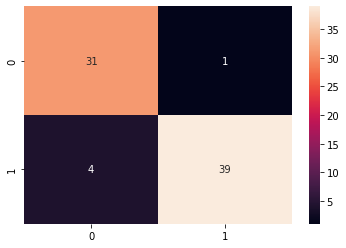

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.89      0.97      0.93        32
        Male       0.97      0.91      0.94        43

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75

